In [13]:
import pandas as pd

In [14]:
df_s = pd.read_csv('./Sales_data_RMF.csv')

/tmp/ipykernel_28549/922523283.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./Sales_data_RMF.csv')


In [15]:
df_s

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,00806233401-26770461124511,2022-08-11,2022-08-08,2022-08-07,13,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA),6390,1 days,3 days,생리대,생리대
199995,00806204436-0461904922687,2022-08-11,2022-08-08,2022-08-07,163,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA),2060,1 days,3 days,생리대,생리대
199996,00806204436-0461904922688,2022-08-12,2022-08-08,2022-08-07,163,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA),1860,1 days,4 days,생리대,생리대
199997,00806215930-05281256126202,2022-08-10,2022-08-08,2022-08-07,5,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA),1860,1 days,2 days,생리대,생리대


In [16]:
dup_cnt = df_s.groupby('고객번호')['구매일'].nunique()

# 새로운 데이터프레임 생성
new_df = pd.DataFrame({
    '고객번호': dup_cnt.index,
    '구매횟수': dup_cnt.values
})

IndexError: Column(s) 배송시간 already selected

In [5]:
new_df

,고객번호,구매횟수
0,201812310749735,1
1,201812310749770,1
2,201812310749771,1
3,201812310749774,2
4,201812310749780,1
...,...,...
97742,20200724113017315991,1
97743,20200729134409126553,1
97744,20200803075905757887,1
97745,20200805170229147688,1


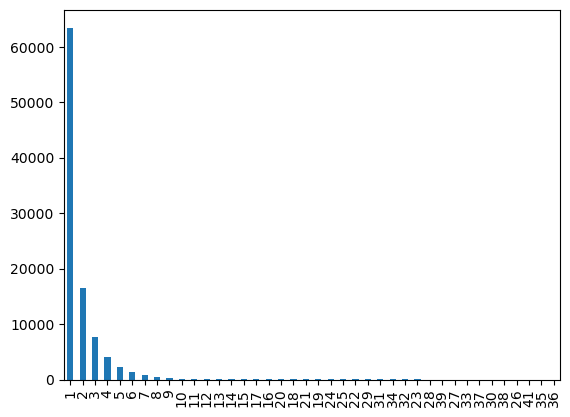

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = new_df['구매횟수'].value_counts()
df.plot.bar()
plt.show()

In [7]:
new_df['구매횟수'].value_counts()

1     63516
2     16602
3      7717
4      4039
5      2304
6      1304
7       746
8       458
9       291
10      150
11      145
12       82
13       72
14       66
15       45
17       33
16       27
20       18
18       16
21       14
19       12
24        9
25        9
22        7
29        7
31        6
34        6
32        6
23        6
28        5
39        5
27        4
33        4
37        4
30        3
38        2
26        2
41        2
35        2
36        1
Name: 구매횟수, dtype: int64

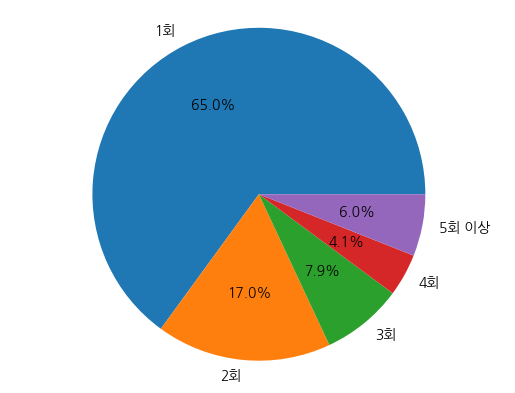

In [8]:
import numpy as np
matplotlib.rc('font',family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

new_df['구매횟수구분'] = pd.cut(new_df['구매횟수'], bins=[0,1,2,3,4,np.inf], labels=['1회','2회','3회','4회','5회 이상'])
customer_counts = new_df['구매횟수구분'].value_counts(sort=False)

plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

new_df
Member_data.csv


In [10]:
df_m = pd.read_csv('./Member_data.csv')
df_m

/tmp/ipykernel_24924/3096139362.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m = pd.read_csv('./Member_data.csv')


,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81355,20200724113017315991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81356,20200729134409126553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81357,20200803075905757887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81358,20200805170229147688,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97747 entries, 0 to 97746
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   고객번호    97747 non-null  object  
 1   구매횟수    97747 non-null  int64   
 2   구매횟수구분  97747 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 1.6+ MB


In [14]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81360 entries, 0 to 81359
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    81360 non-null  object 
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.0+ MB


In [3]:
import pandas as pd
df_m = pd.read_csv('./Member_data.csv')
df_s = pd.read_csv('./New_Sales_data.csv')

/tmp/ipykernel_28367/874311597.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m = pd.read_csv('./Member_data.csv')
/tmp/ipykernel_28367/874311597.py:3: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./New_Sales_data.csv')


In [4]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81360 entries, 0 to 81359
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    81360 non-null  object 
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.0+ MB


In [5]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문번호    199999 non-null  object 
 1   배송완료일   199999 non-null  object 
 2   배송시작일   199999 non-null  object 
 3   구매일     199999 non-null  object 
 4   구매시월령   199999 non-null  float64
 5   고객번호    199999 non-null  object 
 6   구매금액    199999 non-null  int64  
 7   결제금액    199999 non-null  int64  
 8   물품대분류   199999 non-null  object 
 9   상품명     199999 non-null  object 
 10  포인트     199999 non-null  int64  
 11  배송준비시간  199999 non-null  object 
 12  배송시간    199999 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 19.8+ MB


In [7]:
df_s['고객번호'].value_counts()

201903010819119    43
201902220808524    41
201901090756255    41
201901020751222    39
201903010819037    39
                   ..
201908260970157     1
201902260814594     1
201904140870382     1
201908260969992     1
201909160983550     1
Name: 고객번호, Length: 97747, dtype: int64

In [8]:
df_m['고객번호'].value_counts()

201812310749735         1
201908050955039         1
201908050955058         1
201908050955052         1
201908050955047         1
                       ..
201903190843712         1
201903190843708         1
201903190843707         1
201903190843706         1
20200805223526494551    1
Name: 고객번호, Length: 81360, dtype: int64

In [5]:
x =7.6

In [8]:
x = int(x)

In [9]:
x

7